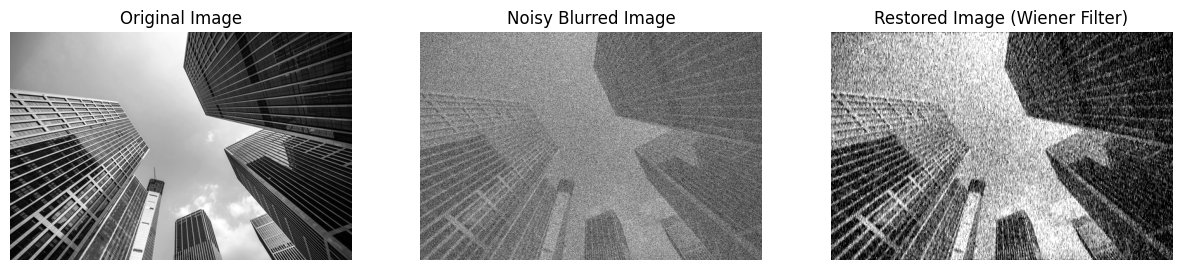

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

image = cv2.imread(r'F:\CV\EX6\360_F_281897358_3rj9ZBSZHo5s0L1ug7uuIHadSxh9Cc75.jpg', cv2.IMREAD_GRAYSCALE)

sigma = 1
gaussian_kernel = cv2.getGaussianKernel(ksize=4, sigma=sigma)
blurred_image = cv2.filter2D(image,-1, gaussian_kernel)


noise_variance =  np.var(blurred_image)
noisy_blurred_image = blurred_image + np.random.normal(0, np.sqrt(noise_variance), blurred_image.shape)

# Apply the Wiener filter to the noisy, blurred image
restored_image = wiener(noisy_blurred_image, mysize=gaussian_kernel.shape, noise=noise_variance)

# Clip the restored image to ensure pixel values are within valid range
restored_image = np.clip(restored_image, 0, 255)

# Plot the original, degraded, and restored images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_blurred_image, cmap='gray')
axes[1].set_title('Noisy Blurred Image')
axes[1].axis('off')

axes[2].imshow(restored_image, cmap='gray')
axes[2].set_title('Restored Image (Wiener Filter)')
axes[2].axis('off')

plt.show()
